# Data Mining Versuch Mobile User Analysis and Gender-Age-Group Prediction
* Autor: Prof. Dr. Johannes Maucher
* Datum: 04.10.2016

[Übersicht Ipython Notebooks im Data Mining Praktikum](Data Mining Praktikum.ipynb)

# Einführung

## Kurzbeschreibung:

In diesem Versuch werden die im Rahmen eines Kaggle-Contest [von _TalkingData_ bereitgestellten Daten](https://www.kaggle.com/c/talkingdata-mobile-user-demographics/data) analysiert. Die Daten enthalten für eine große Menge chinesischer User, Angaben zur Marke und Modell des Smartphones und zu den installierten und aktiven Apps. Ziel ist es aus den zur Verfügung stehenden Trainingsdaten ein Modell zu erlernen, das die Klassifikation der User in die jeweilige Gender-Age-Gruppe erlaubt. Für die Lösung dieser Aufgabe müssen sämtliche Schritte der Data Mining Prozesskette implementiert werden:

1. Datenbeschaffung und Zugriff
2. Datenauswahl: Welche der vorhandenen Daten sind für die gegebene Aufgabe tatsächlich relevant
3. Datenbereinigung: Wie wird mit fehlenden und fehlerhaften Daten umgegangen?
4. Datentransformation: Wie können aus den vorhandenen Daten informative Mermale gewonnen werden?
5. Modellbildung: Unüberwachtes oder überwachtes erlernen eines Modells; Clustering-, Klassifikations- oder Regressionsmodell.
6. Evaluation, Visualisierung und Interpretation der Daten/Ergebnisse

## Lernziele:
In diesem Versuch sollen Kenntnisse in folgenden Themen vermittelt werden:

* Zugriff auf Daten in .csv Files
* Zugriff auf Daten in SQLite Files
* Statistische Analyse und Visualisierung von Daten
* Implementierung der oben genannten Data Mining Prozessschritte, insbesondere:

    * Feature-Engineering: Berechnung von für die gegebene Aufgabe relevanter Daten aus Rohdaten
    * Clustering (unüberwachtes Lernen) 
    * Klassifikation/Prädiktion (überwachtes Lernen) mit verschiedenen Machine Learning Verfahren
    * Evaluation von Klassifikationsverfahren

## Aufgaben zur Vorbereitung

1. Laden Sie die Daten entweder vom Skripteserver oder direkt von [Kaggle](https://www.kaggle.com/c/talkingdata-mobile-user-demographics/data) herunter und versuchen Sie die Daten anhand dieser [Beschreibung](https://www.kaggle.com/c/talkingdata-mobile-user-demographics/data) zu verstehen.
2. In diesem Versuch soll die Gender-Age-Group von Smartphone-Usern vorhergesagt werden. Überlegen Sie sich welche der vorhandenen Daten für diese Vorhersage relevant sein könnten.
3. Für die Vorhersage kann ein beliebiger Klassifikationsalgorithmus aus dem Bereich des überwachten Lernens eingesetzt werden. Das Prinzip des überwachten Lernens und das entsprechende Testen des gelernten Modells ist in der unten aufgeführten Abbildung dargestellt. Machen Sie sich mit diesem Prinzip vertraut.

4. Für das überwachte Lernen sind gelabelte Daten (Soll-Ausgabe) notwendig. In diesem Versuch ist die Ausgabe die Gender-Age-Group der User. Im File *gender\_age\_train.csv* ist für 74645 User (devices) die zugehörigen Gender-Age-Group angegeben. Die Menge aller gelabelten Daten muss für die Modellvalidierung in disjunkte Trainings- und Testpartitionen unterteilt werden. In diesem Versuch kommt sowohl eine einfache Partitionierung in Trainings- und Testdaten als auch eine Kreuzvalidierung zum Einsatz ([KI-Vorlesung](https://www.mi.hdm-stuttgart.de/mib/studium/intern/skripteserver/skripte/Einfuehrung_Kuenstliche_Intelligenz/WS1516/06_PartLernen1.pdf)). Machen Sie sich mit dem Prinzip der Kreuzvalidierung (Abbildung unten) vertraut.

5. Den meisten Machine Learning-Algorithmen können kategoriale Parameter nicht direkt übergeben werden. Diese Parameter werden typisch *One-Hot* encodiert. Machen Sie sich mit diesem Prinzip vertraut.

6. In diesem Versuch soll ein Multilayer-Perzeptron (MLP) als Klassifikator eingesetzt werden. Machen Sie sich mit dem MLP vertraut. [KI-Vorlesung](https://www.mi.hdm-stuttgart.de/mib/studium/intern/skripteserver/skripte/Einfuehrung_Kuenstliche_Intelligenz/WS1516/09_PartLernen4.pdf), [MLP in Scikit-Learn](http://scikit-learn.org/stable/modules/neural_networks_supervised.html).

**Prinzip überwachtes Lernen und Validierung:**
![Prinzip überwachtes Lernen](https://www.hdm-stuttgart.de/~maucher/ipnotebooks/DataMining//Bilder/SupervisedLarningSchemaValidation.png "Überwachtes Lernen Schema")





**Prinzip der 10-fachen Kreuzvalidierung:**

![Kreuzvalidierung](https://www.hdm-stuttgart.de/~maucher/ipnotebooks/DataMining//Bilder/CrossValidation.jpg "Cross-Validation")

# Durchführung
## Datenzugriff
Die Daten sind in insgesamt 7 .csv Files organisiert (das File sample_submission.csv wird nicht benötigt). Die einzelnen .csv Dateien sind z.T. sehr groß. In diesem Fall bietet es sich an, nicht das ganze File in einen Pandas-Dataframe zu laden, sondern das .csv-File zunächst in eine Datenbank zu schreiben und dann auf diese dediziert zuzugreifen. 

_Tipp:_ Mit der auf dem Skripteserver bereitgestellten Datei _brandMap.txt_, können die chinesischen Schriftzeichen in den Markennamen übersetzt werden.

**Aufgaben:**

1. Lesen Sie jedes der .csv Files in chunks von jeweils ca. 20000 Zeilen in einen Pandas Dataframe ein und schreiben Sie die Daten chunk für chunk in eine SQLite Database. Für das Einlesen ist die Pandas-Methode [read_csv()](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html) mit dem Parameter _chunksize_ zu verwenden. Für das schreiben der Daten aus dem Pandas Dataframe in die SQLite Datenbank ist die Pandas-Methode [to_sql()](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.to_sql.html) zu verwenden. Für jedes .csv File soll in der SQLite-DB eine eigene Tabelle angelegt werden. Als DB-connector soll eine engine-Instanz des _SQLAlchemy_-Pakets mit der Methode create\_engine() angelegt werden. Siehe z.B. [SQLAlchemy Doku](http://docs.sqlalchemy.org/en/latest/core/engines.html).

2. Nachdem alle Tabellen der DB angelegt sind, sollen aus jeder Tabelle die ersten 10 Zeilen mit der Pandas Methode [read_sql_query()](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_sql_query.html) abgefragt und angezeigt werden. Ausserdem ist für jede Tabelle die Größe (Anzahl der Zeilen) auszugeben.
3. Wie viele verschiedene devices befinden sich in der Tabelle, welche die Daten aus gender\_age\_train.csv enthält?
4. Wie viele verschiedene devices befinden sich in der Tabelle, welche die Daten aus events.csv enthält?
5. Wie viele verschiedene devices kommen in beiden dieser Tabellen vor? 


In [78]:
import pandas as pd

In [5]:
test2 = pd.read_csv("events.csv", nrows=20)
print(test2)

    event_id            device_id            timestamp  longitude  latitude
0          1    29182687948017175  2016-05-01 00:55:25     121.38     31.24
1          2 -6401643145415154744  2016-05-01 00:54:12     103.65     30.97
2          3 -4833982096941402721  2016-05-01 00:08:05     106.60     29.70
3          4 -6815121365017318426  2016-05-01 00:06:40     104.27     23.28
4          5 -5373797595892518570  2016-05-01 00:07:18     115.88     28.66
5          6  1476664663289716375  2016-05-01 00:27:21       0.00      0.00
6          7  5990807147117726237  2016-05-01 00:15:13     113.73     23.00
7          8  1782450055857303792  2016-05-01 00:15:35     113.94     34.70
8          9 -2073340001552902943  2016-05-01 00:15:33       0.00      0.00
9         10 -8195816569128397698  2016-05-01 00:41:31     119.34     26.04
10        11  8663743929678393765  2016-05-01 00:44:13     106.71     39.51
11        12  8663743929678393765  2016-05-01 00:45:30     106.71     39.51
12        13

In [7]:
test3 = pd.read_csv("gender_age_test.csv", nrows=20)
print(test3)

              device_id
0   1002079943728939269
1  -1547860181818787117
2   7374582448058474277
3  -6220210354783429585
4  -5893464122623104785
5  -7560708697029818408
6    289797889702373958
7   -402874006399730161
8   5751283639860028129
9   -848943298935149395
10  6873889408535437611
11  9097600484609173263
12  7918118984690678938
13 -5723359257508971431
14 -5045999078783569038
15 -4466603005916311099
16  6130118150534832946
17  2245330978838477229
18  6261900729835972204
19   501940708836600976


In [8]:
test3 = pd.read_csv("gender_age_train.csv", nrows=20)
print(test3)

              device_id gender  age agegroup
0  -8076087639492063270      M   35   M32-38
1  -2897161552818060146      M   35   M32-38
2  -8260683887967679142      M   35   M32-38
3  -4938849341048082022      M   30   M29-31
4    245133531816851882      M   30   M29-31
5  -1297074871525174196      F   24   F24-26
6    236877999787307864      M   36   M32-38
7  -8098239495777311881      M   38   M32-38
8    176515041953473526      M   33   M32-38
9   1596610250680140042      F   36   F33-42
10  9032155484127182494      M   31   M29-31
11  7477216237379271436      F   37   F33-42
12  2478205222798310601      F   28   F27-28
13  6352067998666467520      M   32   M32-38
14 -7605360767281960867      M   48     M39+
15  1508636020748379883      F   28   F27-28
16  4380872794486415327      M   38   M32-38
17 -1039701474753771322      M   38   M32-38
18 -6876541075223249434      M   75     M39+
19  6287938418661076759      M   33   M32-38


In [10]:
test3 = pd.read_csv("label_categories.csv", nrows=50)
print(test3)

    label_id                  category
0          1                       NaN
1          2            game-game type
2          3          game-Game themes
3          4            game-Art Style
4          5         game-Leisure time
5          6       game-Cutting things
6          7        game-Finding fault
7          8      game-stress reliever
8          9                  game-pet
9         10               game-Answer
10        11              game-Fishing
11        12      game-Music and Dance
12        13               game-Puzzle
13        14     game-Adventure puzzle
14        15       game-Parkour Racing
15        16              game-Parkour
16        17               game-Racing
17        18           game-Motorcycle
18        19               game-Rowing
19        20             game-aircraft
20        21      game-Gem Elimination
21        22                  game-Box
22        23                  game-gem
23        24          game-Lianliankan
24        25             

In [11]:
test3 = pd.read_csv("phone_brand_device_model.csv", nrows=50)
print(test3)

              device_id phone_brand   device_model
0  -8890648629457979026          小米             红米
1   1277779817574759137          小米           MI 2
2   5137427614288105724          三星      Galaxy S4
3   3669464369358936369       SUGAR           时尚手机
4  -5019277647504317457          三星  Galaxy Note 2
5   3238009352149731868          华为           Mate
6  -3883532755183027260          小米          MI 2S
7  -2972199645857147708          华为          G610S
8  -5827952925479472594          小米    MI One Plus
9  -8262508968076336275        vivo            S7I
10  5840378295166286440          三星      Galaxy S3
11 -5776341595519925628          小米          MI 2A
12  3437705102632680210          三星      Galaxy S3
13 -3568334676360016285          三星      Galaxy S3
14   556978549708484782          小米           MI 2
15  5694497738268412307          小米           MI 3
16  6327116114284382479          华为      G520-0000
17   773248989809697210        vivo          X5Pro
18  -686020914357018824        

In [14]:
from sqlalchemy import create_engine
#Windows
engine = create_engine('sqlite:///C:\\sqlite\\v01.db')
connection = engine.connect()
result = connection.execute("select * from app_events")
print(result)

In [43]:
csvs = ["label_categories","app_events","app_labels","events","gender_age_test","gender_age_train","phone_brand_device_model"]

for csv in csvs:
    for chunk in pd.read_csv(csv+".csv", chunksize=20000):
        chunk.to_sql(csv,connection,if_exists='append',index=False)

In [17]:
print(engine)

Engine(sqlite:///C:\sqlite\v01.db)


In [59]:
for csv in csvs:
    
    data = pd.read_sql_query("select * from "+csv+" LIMIT 10;",connection)
    number = pd.read_sql_query("select Count(*) FROM "+csv+";",connection)
    print("tabelle:   "+csv+ " has "+str(number.iloc[0,0])+" rows")
    print(data)
    print("\n")

tabelle:   label_categories has 1860 rows
   label_id              category
0         1                  None
1         2        game-game type
2         3      game-Game themes
3         4        game-Art Style
4         5     game-Leisure time
5         6   game-Cutting things
6         7    game-Finding fault
7         8  game-stress reliever
8         9              game-pet
9        10           game-Answer


tabelle:   app_events has 32473067 rows
   event_id               app_id  is_installed  is_active
0         2  5927333115845830913             1          1
1         2 -5720078949152207372             1          0
2         2 -1633887856876571208             1          0
3         2  -653184325010919369             1          1
4         2  8693964245073640147             1          1
5         2  4775896950989639373             1          1
6         2 -8022267440849930066             1          0
7         2  9112463267739110219             1          0
8         2 -3725672

In [67]:
unique_devices_gat = pd.read_sql_query("SELECT COUNT(*) FROM (SELECT DISTINCT device_id FROM  gender_age_train);",connection)
print(unique_devices_gat.iloc[0,0])

74645


In [68]:
unique_devices_events = pd.read_sql_query("SELECT COUNT(*) FROM (SELECT DISTINCT device_id FROM  events);",connection)
print(unique_devices_events.iloc[0,0])

60865


In [107]:
unique_devices_events = pd.read_sql_query("SELECT device_id FROM events;",connection)
unique_devices_gat = pd.read_sql_query("SELECT device_id FROM gender_age_train;",connection)


In [108]:
import numpy as np

Wieviele einzigartige devices sind in beiden Tabellen?

In [109]:
len(set(unique_devices_events.device_id.values.tolist()+unique_devices_gat.device_id.values.tolist()))

112201

Wieviele devices sind in BEIDEN Tabellen eingetragen?

In [121]:
both = pd.read_sql_query("SELECT count(distinct events.device_id) FROM events INNER JOIN gender_age_train ON gender_age_train.device_id = events.device_id;",connection)

In [124]:
print(both)

   device_id)
0       23309


In [88]:
print(a)

[   29182687948017175 -6401643145415154744 -4833982096941402721 ...,
  2390927717095168323 -7754266053633390277 -1184626127904161598]


In [ ]:
set([unique_devices_events.device_id.as_matrix,unique_devices_gat.device_id.as_matrix])

In [79]:
type(unique_devices_events.device_id)

pandas.core.series.Series

## Deskriptive Statistik

In der obigen Teilaufgabe sollte die Schnittstelle zwischen Pandas Dataframes und Datenbanken (hier SQLite) demonstriert werden. Diese Art von Datenhandling eignet sich besonders im Fall sehr großer Datenmengen, die nicht im Arbeitsspeicher gehalten werden können. Die Dateien in diesem Versuch sind tatsächlich nicht so groß, dass sie nicht als ganzes in Pandas-Dataframes geladen werden könnten. In allen folgenden Teilversuchen ist Ihnen freigestellt, ob Sie mit der Datenbank-Variante oder der in-memory Variante (alle Daten im Pandas-Dataframe) arbeiten.

### Verteilung der User über die Gender-Age-Gruppen

Die Menge aller User wird in 12 verschiedene Gender-Age-Groups unterteilt. Bestimmen Sie die Verteilung der User in der *gender\_age\_train*-Tabelle über diese 12 Gruppen und viusalisieren Sie diese Verteilung in einem [Matplotlib Bar Chart](http://matplotlib.org/api/pyplot_api.html). 
 

In [126]:
gender_age_groups = pd.read_sql_query("select agegroup from gender_age_train;",connection)

In [161]:
gender_age_groups.iloc[1:30,:]

,agegroup
1,M32-38
2,M32-38
3,M29-31
4,M29-31
5,F24-26
6,M32-38
7,M32-38
8,M32-38
9,F33-42
10,M29-31


In [2]:
%matplotlib inline
from matplotlib import pyplot as plt

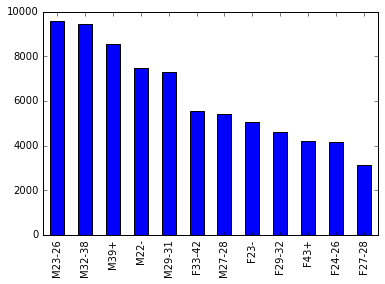

In [160]:
#gender_age_groups.hist(column="agegroup")

gender_age_groups.agegroup.value_counts().plot(kind="bar")

### Verteilung der User über die Smartphone-Marken

1. Bestimmen Sie die Anzahl der verschiedenen Devices und die Anzahl der verschiedenen Marken in der Tabelle *phone\_brand\_device\_model*.

2. Fügen Sie dem Pandas Dataframe mit der *gender_age_train*-Tabelle eine Spalte _brand_ hinzu und schreiben Sie in diese Spalte den Markennamen des zur jeweiligen Zeile gehörenden Device.
3. Schreiben Sie den um den Markennamen erweiterten Dataframe in ein File *gender\_age\_brand\_train.csv*.
4. Bestimmmen Sie mittels der Dataframe-Methode *value_counts()* die Anzahl der Devices pro Marke. 
5. Stellen Sie diese Verteilung der Devices über die Marken für die 20 häufigsten Marken grafisch mit einem *Matplotlib-bar-chart dar.*
6. Untersuchen Sie jetzt die Verteilung der Devices über die Marken pro Gender-Age-Group. Gibt es eine Korrelation zwischen Gender-Age-Group und Häufigkeit der Marken? Überlegen sie sich eine Visualisierung, mit der eine derartige Korrelation bestätigt oder widerlegt werden kann. Implementieren Sie die Visualisierung und zeigen Sie anhand dieser Visualisierung mögliche Korrelationen zwischen Gender-Age-Group und Markenhäufigkeit. 

In [166]:
devices = pd.read_sql_query("select count(distinct(device_id)) from phone_brand_device_model;",connection)
print(devices.iloc[0,0])

186716


In [164]:
phonebrand = pd.read_sql_query("select count(distinct(phone_brand)) from phone_brand_device_model;",connection)
print(phonebrand.iloc[0,0])

131


In [167]:
devices = pd.read_sql_query("select * from phone_brand_device_model limit 20;",connection)
print(devices)

              device_id phone_brand   device_model
0  -8890648629457979026          小米             红米
1   1277779817574759137          小米           MI 2
2   5137427614288105724          三星      Galaxy S4
3   3669464369358936369       SUGAR           时尚手机
4  -5019277647504317457          三星  Galaxy Note 2
5   3238009352149731868          华为           Mate
6  -3883532755183027260          小米          MI 2S
7  -2972199645857147708          华为          G610S
8  -5827952925479472594          小米    MI One Plus
9  -8262508968076336275        vivo            S7I
10  5840378295166286440          三星      Galaxy S3
11 -5776341595519925628          小米          MI 2A
12  3437705102632680210          三星      Galaxy S3
13 -3568334676360016285          三星      Galaxy S3
14   556978549708484782          小米           MI 2
15  5694497738268412307          小米           MI 3
16  6327116114284382479          华为      G520-0000
17   773248989809697210        vivo          X5Pro
18  -686020914357018824        

In [15]:
gender_age_train = pd.read_sql_query("select * from gender_age_train",connection)
device_brand = pd.read_sql_query("select * from phone_brand_device_model",connection)
gender_age_brand_train = pd.merge(gender_age_train, device_brand, on='device_id', how='left').drop("device_model",1)

In [35]:
print(gender_age_brand_train.iloc[1:20,:])

              device_id gender  age agegroup phone_brand
1  -2897161552818060146      M   35   M32-38          小米
2  -8260683887967679142      M   35   M32-38          小米
3  -4938849341048082022      M   30   M29-31          小米
4    245133531816851882      M   30   M29-31          小米
5  -1297074871525174196      F   24   F24-26        OPPO
6    236877999787307864      M   36   M32-38          酷派
7  -8098239495777311881      M   38   M32-38          小米
8    176515041953473526      M   33   M32-38        vivo
9   1596610250680140042      F   36   F33-42          三星
10  9032155484127182494      M   31   M29-31          华为
11  7477216237379271436      F   37   F33-42          华为
12  2478205222798310601      F   28   F27-28          三星
13  6352067998666467520      M   32   M32-38          华为
14 -7605360767281960867      M   48     M39+         艾优尼
15  1508636020748379883      F   28   F27-28          华为
16  4380872794486415327      M   38   M32-38          小米
17 -1039701474753771322      M 

In [16]:
# read in brand map
brandMap = pd.read_csv('brandMap.txt', sep=" ", header=None)
brandMap.columns = ["phone_brand", "latin_phone_brand"]
gender_age_brand_train = pd.merge(gender_age_brand_train,brandMap,on="phone_brand",how="outer")

In [37]:
print(brandMap)

   phone_brand latin_phone_brand
0           三星           samsung
1           天语            Ktouch
2           海信           hisense
3           联想            lenovo
4           欧比               obi
5          爱派尔             ipair
6          努比亚             nubia
7           优米             youmi
8           朵唯              dowe
9           黑米             heymi
10          锤子            hammer
11        酷比魔方            koobee
12          美图             meitu
13         尼比鲁            nibilu
14          一加           oneplus
15          优购             yougo
16         诺基亚             nokia
17         糖葫芦             candy
18        中国移动              ccmc
19          语信             yuxin
20          基伍              kiwu
21          青橙            greeno
22          华硕              asus
23          夏新         panosonic
24          维图             weitu
25         艾优尼           aiyouni
26        摩托罗拉              moto
27          乡米           xiangmi
28          米奇             micky
29        

In [39]:
print(gender_age_brand_train)

                 device_id gender  age agegroup phone_brand latin_phone_brand
0     -8076087639492063270      M   35   M32-38          小米            xiaomi
1     -2897161552818060146      M   35   M32-38          小米            xiaomi
2     -8260683887967679142      M   35   M32-38          小米            xiaomi
3     -4938849341048082022      M   30   M29-31          小米            xiaomi
4       245133531816851882      M   30   M29-31          小米            xiaomi
5     -8098239495777311881      M   38   M32-38          小米            xiaomi
6      4380872794486415327      M   38   M32-38          小米            xiaomi
7     -1039701474753771322      M   38   M32-38          小米            xiaomi
8      6287938418661076759      M   33   M32-38          小米            xiaomi
9      8026504930081700361      M   25   M23-26          小米            xiaomi
10    -9216966316587614491      M   29   M29-31          小米            xiaomi
11     7106922851105968241      M   22     M22-          小米     

In [40]:
gender_age_brand_train.to_csv("gender_age_brand_train.csv")

In [18]:
# devices pro Marke
#import math
brand_train = gender_age_brand_train.iloc[:,4:6]
brand_train['brand_merge']='undefined'

for i in range(0,len(brand_train.index)):
    #if(math.isnan(brand_train.iloc[i,1])):
    if(type(brand_train.iloc[i,1])!=str):
        brand_train.iloc[i,2] = brand_train.iloc[i,0]
    else:
        brand_train.iloc[i,2] = brand_train.iloc[i,1]

        
print(brand_train.iloc[1:20,:])


   phone_brand latin_phone_brand brand_merge
1           小米            xiaomi      xiaomi
2           小米            xiaomi      xiaomi
3           小米            xiaomi      xiaomi
4           小米            xiaomi      xiaomi
5           小米            xiaomi      xiaomi
6           小米            xiaomi      xiaomi
7           小米            xiaomi      xiaomi
8           小米            xiaomi      xiaomi
9           小米            xiaomi      xiaomi
10          小米            xiaomi      xiaomi
11          小米            xiaomi      xiaomi
12          小米            xiaomi      xiaomi
13          小米            xiaomi      xiaomi
14          小米            xiaomi      xiaomi
15          小米            xiaomi      xiaomi
16          小米            xiaomi      xiaomi
17          小米            xiaomi      xiaomi
18          小米            xiaomi      xiaomi
19          小米            xiaomi      xiaomi


In [80]:
type(brand_train.iloc[0,1])

str

In [81]:
str

str

In [79]:
import math
math.isnan(brand_train.iloc[1,1])

TypeError: a float is required

brand_train.iloc[:,2].isnull().values.any()

In [68]:
brand_train.iloc[:,2]

0        xiaomi
1        xiaomi
2        xiaomi
3        xiaomi
4        xiaomi
5        xiaomi
6        xiaomi
7        xiaomi
8        xiaomi
9        xiaomi
10       xiaomi
11       xiaomi
12       xiaomi
13       xiaomi
14       xiaomi
15       xiaomi
16       xiaomi
17       xiaomi
18       xiaomi
19       xiaomi
20       xiaomi
21       xiaomi
22       xiaomi
23       xiaomi
24       xiaomi
25       xiaomi
26       xiaomi
27       xiaomi
28       xiaomi
29       xiaomi
          ...  
74809       NaN
74810       NaN
74811       NaN
74812       NaN
74813      mole
74814     desci
74815     desci
74816     desci
74817       NaN
74818       NaN
74819       NaN
74820       NaN
74821       NaN
74822       NaN
74823       NaN
74824       NaN
74825       NaN
74826       NaN
74827       NaN
74828       NaN
74829       NaN
74830       NaN
74831       NaN
74832       NaN
74833       NaN
74834       NaN
74835       NaN
74836       NaN
74837        fs
74838       NaN
Name: brand_merge, dtype

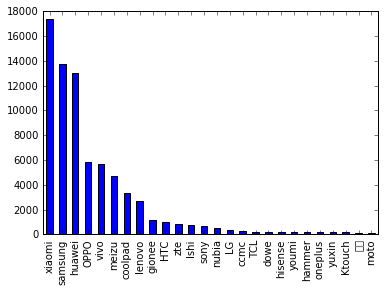

In [100]:
brand_train.iloc[:,2].value_counts().where(lambda x : x>100).dropna().plot(kind="bar")

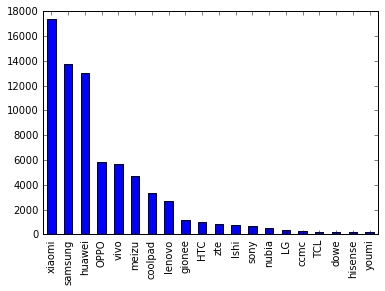

In [102]:
brand_train.iloc[:,2].value_counts().iloc[0:20].plot(kind="bar")

In [97]:
test = brand_train.iloc[:,2].value_counts().where(lambda x : x>100).dropna()

In [98]:
print(test)

xiaomi     17336.0
samsung    13706.0
huawei     13001.0
OPPO        5802.0
vivo        5658.0
meizu       4710.0
coolpad     3349.0
lenovo      2695.0
gionee      1124.0
HTC         1015.0
zte          861.0
lshi         760.0
sony         717.0
nubia        484.0
LG           333.0
ccmc         275.0
TCL          222.0
dowe         213.0
hisense      204.0
youmi        192.0
hammer       191.0
oneplus      174.0
yuxin        170.0
Ktouch       159.0
奇酷           140.0
moto         103.0
Name: brand_merge, dtype: float64


In [61]:
len(brand_train.index)

74839

In [54]:
brand_train.iloc[600,0]

'小米'

In [49]:
len(brand_train.index)

74839

Current size: [15.0, 12.0]


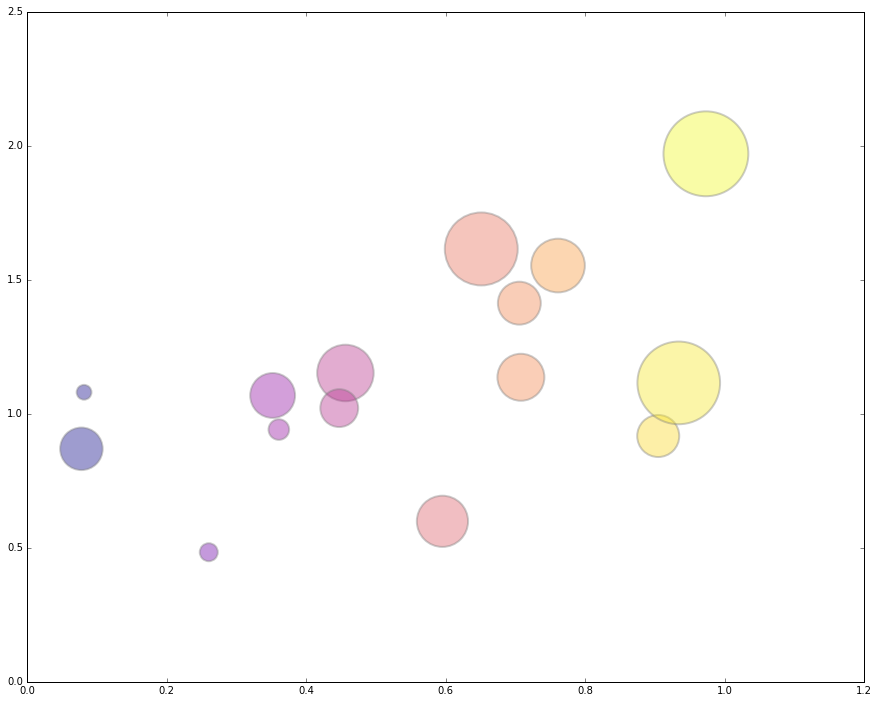

In [8]:
# library & dataset
#from matplotlib import pyplot as plt
#import numpy as np

# Get current size
fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print("Current size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 15
fig_size[1] = 12

plt.rcParams["figure.figsize"] = fig_size
# create data
x = np.random.rand(15)
y = x+np.random.rand(15)
z = x+np.random.rand(15)
z=z*z

# Use it with a call in cmap
#plt.scatter(x, y, s=z*2000, c=x, cmap="BuPu", alpha=0.4, edgecolors="grey", linewidth=2)

# You can reverse it:
#plt.scatter(x, y, s=z*2000, c=x, cmap="BuPu_r", alpha=0.4, edgecolors="grey", linewidth=2)

# OTHER: viridis / inferno / plasma / magma
plt.scatter(x, y, s=z*2000, c=x, cmap="plasma", alpha=0.4, edgecolors="grey", linewidth=2)

In [11]:
import pandas as pd
gender_age_brand_train = pd.read_csv("gender_age_brand_train.csv")

In [25]:
gender_age_train = pd.read_sql_query("select * from gender_age_train",connection)
device_brand = pd.read_sql_query("select * from phone_brand_device_model",connection)
gender_age_brand_train = pd.merge(gender_age_train, device_brand, on='device_id', how='left').drop("device_model",1)

brand_train = gender_age_brand_train
brand_train['brand_merge']='undefined'
print(brand_train.iloc[1:5,:])

             device_id gender  age agegroup phone_brand brand_merge
1 -2897161552818060146      M   35   M32-38          小米   undefined
2 -8260683887967679142      M   35   M32-38          小米   undefined
3 -4938849341048082022      M   30   M29-31          小米   undefined
4   245133531816851882      M   30   M29-31          小米   undefined


In [30]:
# devices pro Marke
#import math
gender_age_train = pd.read_sql_query("select * from gender_age_train",connection)
device_brand = pd.read_sql_query("select * from phone_brand_device_model",connection)
gender_age_brand_train = pd.merge(gender_age_train, device_brand, on='device_id', how='left').drop("device_model",1)

# read in brand map
brandMap = pd.read_csv('brandMap.txt', sep=" ", header=None)
brandMap.columns = ["phone_brand", "latin_phone_brand"]
gender_age_brand_train = pd.merge(gender_age_brand_train,brandMap,on="phone_brand",how="outer")



brand_train = gender_age_brand_train
brand_train['brand_merge']='undefined'

for i in range(0,len(brand_train.index)):
    #if(math.isnan(brand_train.iloc[i,1])):
    if(type(brand_train.iloc[i,5])!=str):
        brand_train.iloc[i,6] = brand_train.iloc[i,4]
    else:
        brand_train.iloc[i,6] = brand_train.iloc[i,5]

        
print(brand_train.iloc[1:10,:])

             device_id gender  age agegroup phone_brand latin_phone_brand  \
1 -2897161552818060146      M   35   M32-38          小米            xiaomi   
2 -8260683887967679142      M   35   M32-38          小米            xiaomi   
3 -4938849341048082022      M   30   M29-31          小米            xiaomi   
4   245133531816851882      M   30   M29-31          小米            xiaomi   
5 -8098239495777311881      M   38   M32-38          小米            xiaomi   
6  4380872794486415327      M   38   M32-38          小米            xiaomi   
7 -1039701474753771322      M   38   M32-38          小米            xiaomi   
8  6287938418661076759      M   33   M32-38          小米            xiaomi   
9  8026504930081700361      M   25   M23-26          小米            xiaomi   

  brand_merge  
1      xiaomi  
2      xiaomi  
3      xiaomi  
4      xiaomi  
5      xiaomi  
6      xiaomi  
7      xiaomi  
8      xiaomi  
9      xiaomi  


In [223]:
device_gender_age_agegroup_brand = brand_train

In [224]:
device_gender_age_agegroup_brand = device_gender_age_agegroup_brand.drop("phone_brand",1).drop("latin_phone_brand",1)

In [225]:
device_gender_age_agegroup_brand.to_csv("device_gender_age_agegroup_brand.csv")

In [226]:
print(device_gender_age_agegroup_brand.iloc[1:10,:])

             device_id gender  age agegroup brand_merge
1 -2897161552818060146      M   35   M32-38      xiaomi
2 -8260683887967679142      M   35   M32-38      xiaomi
3 -4938849341048082022      M   30   M29-31      xiaomi
4   245133531816851882      M   30   M29-31      xiaomi
5 -8098239495777311881      M   38   M32-38      xiaomi
6  4380872794486415327      M   38   M32-38      xiaomi
7 -1039701474753771322      M   38   M32-38      xiaomi
8  6287938418661076759      M   33   M32-38      xiaomi
9  8026504930081700361      M   25   M23-26      xiaomi


In [227]:
data = device_gender_age_agegroup_brand

In [228]:
agegroups = data.agegroup.unique()
print(agegroups)

['M32-38' 'M29-31' 'M23-26' 'M22-' 'M39+' 'F27-28' 'M27-28' 'F29-32'
 'F33-42' 'F23-' 'F43+' 'F24-26']


In [296]:
dataframe = pd.DataFrame(index=data.agegroup.unique(),columns=data.brand_merge.unique())
#print(dataframe)
for agegroup in agegroups:
    #print(agegroup)
    #print(dataframe.loc[agegroup,:])
    dataframe.loc[agegroup] = data.query("agegroup == @agegroup").loc[:,"brand_merge"].value_counts()


print(dataframe)

       xiaomi OPPO coolpad vivo samsung huawei aiyouni meizu nubia youmi ...   \
M32-38   2147  554     448  466    1929   1938       7   444    71    36 ...    
M29-31   1766  441     338  396    1316   1406       3   455    55    19 ...    
M23-26   2440  712     410  700    1420   1508      10   947    92    20 ...    
M22-     1929  675     360  692     857   1015       4   833    60     7 ...    
M39+     1745  442     491  394    1777   1945       3   282    51    19 ...    
F27-28    796  299     119  345     590    428     NaN   179    11     6 ...    
M27-28   1379  397     223  350     964    932       3   443    41    21 ...    
F29-32   1098  429     143  414    1025    752       4   202    17    16 ...    
F33-42   1174  407     268  355    1360   1106     NaN   181    22    14 ...    
F23-      946  741     218  801     682    620       4   326    21    12 ...    
F43+      935  260     195  220    1026    784       1   156    23    15 ...    
F24-26    981  445     136  

In [48]:
print(data.iloc[1:10,:])

             device_id gender  age agegroup brand_merge
1 -2897161552818060146      M   35   M32-38      xiaomi
2 -8260683887967679142      M   35   M32-38      xiaomi
3 -4938849341048082022      M   30   M29-31      xiaomi
4   245133531816851882      M   30   M29-31      xiaomi
5 -8098239495777311881      M   38   M32-38      xiaomi
6  4380872794486415327      M   38   M32-38      xiaomi
7 -1039701474753771322      M   38   M32-38      xiaomi
8  6287938418661076759      M   33   M32-38      xiaomi
9  8026504930081700361      M   25   M23-26      xiaomi


In [53]:
data.query('agegroup == "M32-38"').loc[:,"brand_merge"].value_counts()

xiaomi       2147
huawei       1938
samsung      1929
OPPO          554
vivo          466
coolpad       448
meizu         444
lenovo        361
zte           144
HTC           133
lshi          132
gionee        129
sony           96
nubia          71
ccmc           58
LG             51
youmi          36
TCL            30
奇酷             30
yuxin          26
hisense        25
oneplus        24
Ktouch         20
hammer         17
dowe           13
moto           13
asus           12
ZUK            10
aiyouni         7
ipair           7
             ... 
panosonic       3
newman          2
kupo            2
百加              2
meitu           2
bodao           2
至尊宝             2
bigcola         2
weimi           2
mige            2
斐讯              2
ZOYE            1
欧乐迪             1
首云              1
nibilu          1
micky           1
白米              1
smallt          1
大Q              1
nokia           1
台电              1
虾米              1
Lovme           1
pner            1
desci     

In [43]:
df2 = pd.DataFrame(index=agegroups)
print(df2)

Empty DataFrame
Columns: []
Index: [M32-38, M29-31, M23-26, M22-, M39+, F27-28, M27-28, F29-32, F33-42, F23-, F43+, F24-26]


In [64]:
dataframe.index

Index(['M32-38', 'M29-31', 'M23-26', 'M22-', 'M39+', 'F27-28', 'M27-28',
       'F29-32', 'F33-42', 'F23-', 'F43+', 'F24-26'],
      dtype='object')

In [65]:
dataframe.columns

Index(['xiaomi', 'OPPO', 'coolpad', 'vivo', 'samsung', 'huawei', 'aiyouni',
       'meizu', 'nubia', 'youmi',
       ...
       'MIL', '大显', '蓝魔', '丰米', '鲜米', '飞利浦', '优语', '西门子', 'fs', '欧乐酷'],
      dtype='object', length=119)

In [83]:
dataframe2 = dataframe.drop([col for col, val in dataframe.sum().iteritems() if val < 100], axis=1, inplace=True)

In [74]:
print(dataframe)

       xiaomi OPPO coolpad vivo samsung huawei meizu nubia youmi  HTC ...   \
M32-38   2147  554     448  466    1929   1938   444    71    36  133 ...    
M29-31   1766  441     338  396    1316   1406   455    55    19  127 ...    
M23-26   2440  712     410  700    1420   1508   947    92    20  149 ...    
M22-     1929  675     360  692     857   1015   833    60     7  109 ...    
M39+     1745  442     491  394    1777   1945   282    51    19  111 ...    
F27-28    796  299     119  345     590    428   179    11     6   31 ...    
M27-28   1379  397     223  350     964    932   443    41    21   65 ...    
F29-32   1098  429     143  414    1025    752   202    17    16   55 ...    
F33-42   1174  407     268  355    1360   1106   181    22    14   65 ...    
F23-      946  741     218  801     682    620   326    21    12   56 ...    
F43+      935  260     195  220    1026    784   156    23    15   57 ...    
F24-26    981  445     136  525     760    567   262    20     7

In [230]:
dataframe2 = dataframe.loc[:,(dataframe.sum(axis=0) > 2500)]
print(dataframe2)
#plt.figure();
#dataframe2.sort_index().plot(kind="bar")

       xiaomi OPPO coolpad vivo samsung huawei meizu lenovo
M32-38   2147  554     448  466    1929   1938   444    361
M29-31   1766  441     338  396    1316   1406   455    254
M23-26   2440  712     410  700    1420   1508   947    333
M22-     1929  675     360  692     857   1015   833    262
M39+     1745  442     491  394    1777   1945   282    408
F27-28    796  299     119  345     590    428   179     82
M27-28   1379  397     223  350     964    932   443    183
F29-32   1098  429     143  414    1025    752   202    148
F33-42   1174  407     268  355    1360   1106   181    192
F23-      946  741     218  801     682    620   326    166
F43+      935  260     195  220    1026    784   156    185
F24-26    981  445     136  525     760    567   262    121


In [ ]:
# creating a dict file 
brand = {'xiamoi': 1,'OPPO': 2, 'coolpad':3,'vivo':4,'samsung':5,'huawei':6,'meizu':7,'lenovo':8}

 
# traversing through dataframe
# Gender column and writing
# values where key matches
data = dataframe2.copy()
data.Gender = [brand[item] for item in data.Gender]

In [135]:
print(dataframe2)

       xiaomi OPPO coolpad vivo samsung huawei meizu lenovo
M32-38   2147  554     448  466    1929   1938   444    361
M29-31   1766  441     338  396    1316   1406   455    254
M23-26   2440  712     410  700    1420   1508   947    333
M22-     1929  675     360  692     857   1015   833    262
M39+     1745  442     491  394    1777   1945   282    408
F27-28    796  299     119  345     590    428   179     82
M27-28   1379  397     223  350     964    932   443    183
F29-32   1098  429     143  414    1025    752   202    148
F33-42   1174  407     268  355    1360   1106   181    192
F23-      946  741     218  801     682    620   326    166
F43+      935  260     195  220    1026    784   156    185
F24-26    981  445     136  525     760    567   262    121


In [152]:
dataframe2.index.values

array(['M32-38', 'M29-31', 'M23-26', 'M22-', 'M39+', 'F27-28', 'M27-28',
       'F29-32', 'F33-42', 'F23-', 'F43+', 'F24-26'], dtype=object)

In [181]:
df = dataframe2.copy()
df = df.sort_index(inplace=True)

In [185]:
dataframe2

,xiaomi,OPPO,coolpad,vivo,samsung,huawei,meizu,lenovo
M32-38,2147,554,448,466,1929,1938,444,361
M29-31,1766,441,338,396,1316,1406,455,254
M23-26,2440,712,410,700,1420,1508,947,333
M22-,1929,675,360,692,857,1015,833,262
M39+,1745,442,491,394,1777,1945,282,408
F27-28,796,299,119,345,590,428,179,82
M27-28,1379,397,223,350,964,932,443,183
F29-32,1098,429,143,414,1025,752,202,148
F33-42,1174,407,268,355,1360,1106,181,192
F23-,946,741,218,801,682,620,326,166


In [191]:
index_names = dataframe2.index.values
index = [4,3,1,0,5,8,2,9,10,6,11,7]

In [192]:
index_names

array(['M32-38', 'M29-31', 'M23-26', 'M22-', 'M39+', 'F27-28', 'M27-28',
       'F29-32', 'F33-42', 'F23-', 'F43+', 'F24-26'], dtype=object)

In [196]:
df3 = dataframe2.copy()
df3.index = index

In [197]:
df3

,xiaomi,OPPO,coolpad,vivo,samsung,huawei,meizu,lenovo
4,2147,554,448,466,1929,1938,444,361
3,1766,441,338,396,1316,1406,455,254
1,2440,712,410,700,1420,1508,947,333
0,1929,675,360,692,857,1015,833,262
5,1745,442,491,394,1777,1945,282,408
8,796,299,119,345,590,428,179,82
2,1379,397,223,350,964,932,443,183
9,1098,429,143,414,1025,752,202,148
10,1174,407,268,355,1360,1106,181,192
6,946,741,218,801,682,620,326,166


In [200]:
df3.sort_index(inplace=True)
df3

,xiaomi,OPPO,coolpad,vivo,samsung,huawei,meizu,lenovo
0,1929,675,360,692,857,1015,833,262
1,2440,712,410,700,1420,1508,947,333
2,1379,397,223,350,964,932,443,183
3,1766,441,338,396,1316,1406,455,254
4,2147,554,448,466,1929,1938,444,361
5,1745,442,491,394,1777,1945,282,408
6,946,741,218,801,682,620,326,166
7,981,445,136,525,760,567,262,121
8,796,299,119,345,590,428,179,82
9,1098,429,143,414,1025,752,202,148


In [188]:
index

[4, 3, 1, 0, 5, 8, 2, 9, 10, 6, 11, 7]

In [186]:
dataframe2.sort_index

<bound method DataFrame.sort_index of        xiaomi OPPO coolpad vivo samsung huawei meizu lenovo
M32-38   2147  554     448  466    1929   1938   444    361
M29-31   1766  441     338  396    1316   1406   455    254
M23-26   2440  712     410  700    1420   1508   947    333
M22-     1929  675     360  692     857   1015   833    262
M39+     1745  442     491  394    1777   1945   282    408
F27-28    796  299     119  345     590    428   179     82
M27-28   1379  397     223  350     964    932   443    183
F29-32   1098  429     143  414    1025    752   202    148
F33-42   1174  407     268  355    1360   1106   181    192
F23-      946  741     218  801     682    620   326    166
F43+      935  260     195  220    1026    784   156    185
F24-26    981  445     136  525     760    567   262    121>

In [ ]:
df2=df.sort_index(ascending=0)

In [220]:
dataframe2

,xiaomi,OPPO,coolpad,vivo,samsung,huawei,meizu,lenovo
F23-,2147,554,448,466,1929,1938,444,361
F24-26,1766,441,338,396,1316,1406,455,254
F27-28,2440,712,410,700,1420,1508,947,333
F29-32,1929,675,360,692,857,1015,833,262
F33-42,1745,442,491,394,1777,1945,282,408
F43+,796,299,119,345,590,428,179,82
M22-,1379,397,223,350,964,932,443,183
M23-26,1098,429,143,414,1025,752,202,148
M27-28,1174,407,268,355,1360,1106,181,192
M29-31,946,741,218,801,682,620,326,166


In [212]:
print(np.sort(dataframe2.index.values))

['F23-' 'F24-26' 'F27-28' 'F29-32' 'F33-42' 'F43+' 'M22-' 'M23-26' 'M27-28'
 'M29-31' 'M32-38' 'M39+']


In [241]:
print(dataframe2)

       xiaomi OPPO coolpad vivo samsung huawei meizu lenovo
M32-38   2147  554     448  466    1929   1938   444    361
M29-31   1766  441     338  396    1316   1406   455    254
M23-26   2440  712     410  700    1420   1508   947    333
M22-     1929  675     360  692     857   1015   833    262
M39+     1745  442     491  394    1777   1945   282    408
F27-28    796  299     119  345     590    428   179     82
M27-28   1379  397     223  350     964    932   443    183
F29-32   1098  429     143  414    1025    752   202    148
F33-42   1174  407     268  355    1360   1106   181    192
F23-      946  741     218  801     682    620   326    166
F43+      935  260     195  220    1026    784   156    185
F24-26    981  445     136  525     760    567   262    121


In [242]:
index_names = np.sort(dataframe2.index.values)
print(index_names)
index = [i in range(0,11)]

df = dataframe2.copy()
df.index = index_names
print(df)

['F23-' 'F24-26' 'F27-28' 'F29-32' 'F33-42' 'F43+' 'M22-' 'M23-26' 'M27-28'
 'M29-31' 'M32-38' 'M39+']
       xiaomi OPPO coolpad vivo samsung huawei meizu lenovo
F23-     2147  554     448  466    1929   1938   444    361
F24-26   1766  441     338  396    1316   1406   455    254
F27-28   2440  712     410  700    1420   1508   947    333
F29-32   1929  675     360  692     857   1015   833    262
F33-42   1745  442     491  394    1777   1945   282    408
F43+      796  299     119  345     590    428   179     82
M22-     1379  397     223  350     964    932   443    183
M23-26   1098  429     143  414    1025    752   202    148
M27-28   1174  407     268  355    1360   1106   181    192
M29-31    946  741     218  801     682    620   326    166
M32-38    935  260     195  220    1026    784   156    185
M39+      981  445     136  525     760    567   262    121


['F23-' 'F24-26' 'F27-28' 'F29-32' 'F33-42' 'F43+' 'M22-' 'M23-26' 'M27-28'
 'M29-31' 'M32-38' 'M39+']
   xiaomi OPPO coolpad vivo samsung huawei meizu lenovo
9    2147  554     448  466    1929   1938   444    361
11   1766  441     338  396    1316   1406   455    254
5    2440  712     410  700    1420   1508   947    333
7    1929  675     360  692     857   1015   833    262
8    1745  442     491  394    1777   1945   282    408
10    796  299     119  345     590    428   179     82
3    1379  397     223  350     964    932   443    183
2    1098  429     143  414    1025    752   202    148
6    1174  407     268  355    1360   1106   181    192
1     946  741     218  801     682    620   326    166
0     935  260     195  220    1026    784   156    185
4     981  445     136  525     760    567   262    121
[ 0  1  2  3  4  5  6  7  8  9 10 11]


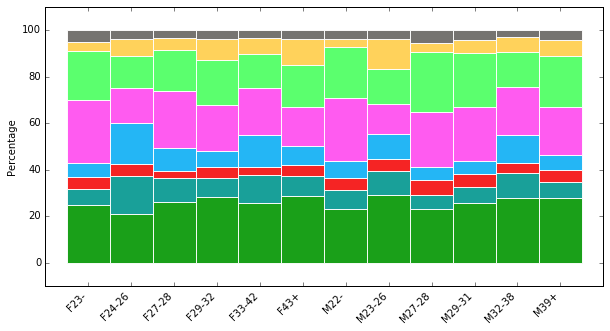

In [243]:


index_names = np.sort(dataframe2.index.values)
print(index_names)
index = [i in range(0,11)]

df = dataframe2.copy()
df.index = [9,11,5,7,8,10,3,2,6,1,0,4]
print(df)

df.sort_index(inplace=True)
#print(df)
# Create a figure with a single subplot
f, ax = plt.subplots(1, figsize=(10,5))

# Set bar width at 1
bar_width = 1

# positions of the left bar-boundaries
bar_l = [i for i in range(len(df["xiaomi"]))] 

# positions of the x-axis ticks (center of the bars as bar labels)
tick_pos = [i+(bar_width/2) for i in bar_l] 

# Create the total score for each participant
columns = [df['xiaomi'], df['OPPO'], df['coolpad'], df["vivo"],df["samsung"],df["huawei"],df["meizu"],df["lenovo"]]
totals = [i1+i2+i3+i4+i5+i6+i7+i8 for i1,i2,i3,i4,i5,i6,i7,i8 in zip(df['xiaomi'], df['OPPO'], df['coolpad'], df["vivo"],df["samsung"],df["huawei"],df["meizu"],df["lenovo"])]
#print(totals)
# Create the percentage of the total score the pre_score value for each participant was
xia_rel = [i / j * 100 for  i,j in zip(df['xiaomi'], totals)]
#print(xia_rel)
# Create the percentage of the total score the mid_score value for each participant was
oppo_rel = [i / j * 100 for  i,j in zip(df['OPPO'], totals)]
#print(oppo_rel)
# Create the percentage of the total score the post_score value for each participant was
coolpad_rel = [i / j * 100 for  i,j in zip(df['coolpad'], totals)]

# Create the percentage of the total score the post_score value for each participant was
vivo_rel = [i / j * 100 for  i,j in zip(df['vivo'], totals)]

# Create the percentage of the total score the post_score value for each participant was
samsung_rel = [i / j * 100 for  i,j in zip(df['samsung'], totals)]

# Create the percentage of the total score the post_score value for each participant was
huawei_rel = [i / j * 100 for  i,j in zip(df['huawei'], totals)]

# Create the percentage of the total score the post_score value for each participant was
meizu_rel = [i / j * 100 for  i,j in zip(df['meizu'], totals)]

# Create the percentage of the total score the post_score value for each participant was
lenovo_rel = [i / j * 100 for  i,j in zip(df['lenovo'], totals)]

names = ["xiaomi","OPPO","coolpad","vivo","samsung","huawei","meizu","lenovo"]
rels = [xia_rel,oppo_rel,coolpad_rel,vivo_rel,samsung_rel,huawei_rel,meizu_rel,lenovo_rel]
#print(rels)
colors = ["#019600","#00968e","#f40c0c","#0caef4","#ff49ef","#49ff5e","#ffce49","#666460"]

#for rel in range(0,len(rels)):
    #ax.bar(bar_l,rels[rel],label = names[rel], alpha=0.9, color=colors[rel],width=bar_width,edgecolor="white")

#for rel in range(0,5):
   # ax.bar(bar_l,rels[rel],label = names[rel], alpha=0.9, color=colors[rel],width=bar_width,edgecolor="white")
    
bottom = [0] * 8


#print(zip(rels[4:]))

for rel in range(0,len(rels)):
# Create a bar chart in position bar_1
    if rel==0:
        btm=[0]*12
    else:
        btm=[sum(x) for x in zip(*rels[:rel])]
        
    ax.bar(bar_l, 
       # using mid_rel data
       rels[rel], 
       # with pre_rel
       bottom=btm, 
       # labeled 
       label=names[rel], 
       # with alpha
       alpha=0.9, 
       # with color
       color=colors[rel], 
       # with bar width
       width=bar_width,
       # with border color
       edgecolor='white'
       ) 
    
# Set the ticks to be first names
print(df.index.values)
plt.xticks(tick_pos, index_names)
ax.set_ylabel("Percentage")
ax.set_xlabel("")

# Let the borders of the graphic
plt.xlim([min(tick_pos)-bar_width, max(tick_pos)+bar_width])
plt.ylim(-10, 110)

# rotate axis labels
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')

# shot plot
plt.show()   

['F23-' 'F24-26' 'F27-28' 'F29-32' 'F33-42' 'F43+' 'M22-' 'M23-26' 'M27-28'
 'M29-31' 'M32-38' 'M39+']
   xiaomi OPPO coolpad vivo samsung huawei meizu lenovo
9    2147  554     448  466    1929   1938   444    361
11   1766  441     338  396    1316   1406   455    254
5    2440  712     410  700    1420   1508   947    333
7    1929  675     360  692     857   1015   833    262
8    1745  442     491  394    1777   1945   282    408
10    796  299     119  345     590    428   179     82
3    1379  397     223  350     964    932   443    183
2    1098  429     143  414    1025    752   202    148
6    1174  407     268  355    1360   1106   181    192
1     946  741     218  801     682    620   326    166
0     935  260     195  220    1026    784   156    185
4     981  445     136  525     760    567   262    121
   xiaomi OPPO coolpad vivo samsung huawei meizu lenovo
0     935  260     195  220    1026    784   156    185
1     946  741     218  801     682    620   326    166
2

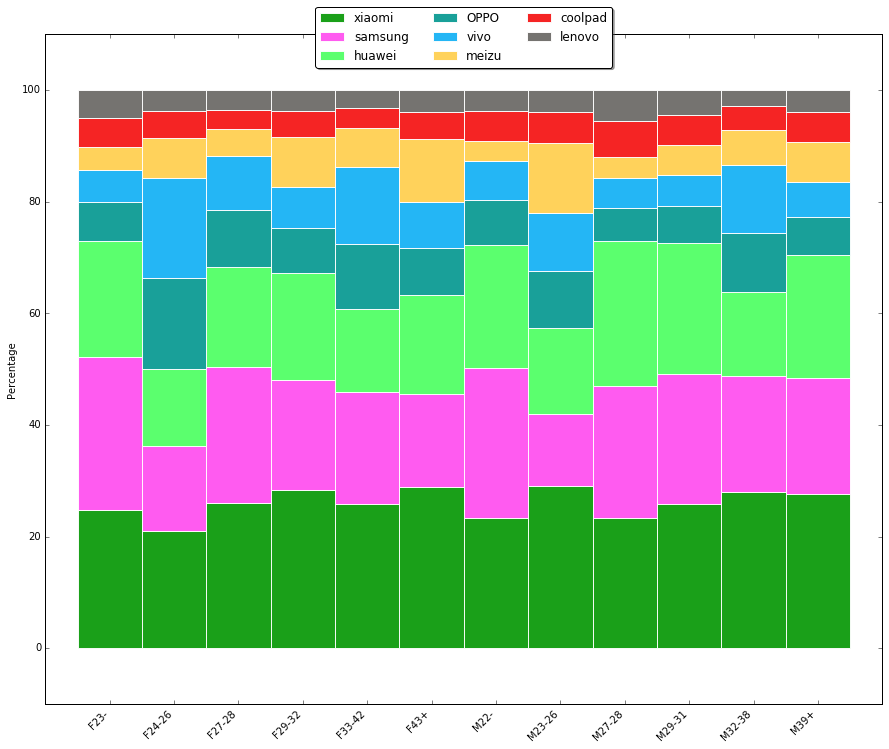

In [327]:
index_names = np.sort(dataframe2.index.values)
print(index_names)
index = [i in range(0,11)]

df = dataframe2.copy()
df.index = [9,11,5,7,8,10,3,2,6,1,0,4]
print(df)

df.sort_index(inplace=True)
print(df)
# Create a figure with a single subplot
f, ax = plt.subplots(1, figsize=(15,12))

# Set bar width at 1
bar_width = 1

# positions of the left bar-boundaries
bar_l = [i for i in range(len(df["xiaomi"]))] 

# positions of the x-axis ticks (center of the bars as bar labels)
tick_pos = [i+(bar_width/2) for i in bar_l] 

# Create the total score for each participant
columns = [df['xiaomi'], df['OPPO'], df['coolpad'], df["vivo"],df["samsung"],df["huawei"],df["meizu"],df["lenovo"]]
totals = [i1+i2+i3+i4+i5+i6+i7+i8 for i1,i2,i3,i4,i5,i6,i7,i8 in zip(df['xiaomi'], df['OPPO'], df['coolpad'], df["vivo"],df["samsung"],df["huawei"],df["meizu"],df["lenovo"])]
#print(totals)
# Create the percentage of the total score the pre_score value for each participant was
xia_rel = [i / j * 100 for  i,j in zip(df['xiaomi'], totals)]
#print(xia_rel)
# Create the percentage of the total score the mid_score value for each participant was
oppo_rel = [i / j * 100 for  i,j in zip(df['OPPO'], totals)]
#print(oppo_rel)
# Create the percentage of the total score the post_score value for each participant was
coolpad_rel = [i / j * 100 for  i,j in zip(df['coolpad'], totals)]

# Create the percentage of the total score the post_score value for each participant was
vivo_rel = [i / j * 100 for  i,j in zip(df['vivo'], totals)]

# Create the percentage of the total score the post_score value for each participant was
samsung_rel = [i / j * 100 for  i,j in zip(df['samsung'], totals)]

# Create the percentage of the total score the post_score value for each participant was
huawei_rel = [i / j * 100 for  i,j in zip(df['huawei'], totals)]

# Create the percentage of the total score the post_score value for each participant was
meizu_rel = [i / j * 100 for  i,j in zip(df['meizu'], totals)]

# Create the percentage of the total score the post_score value for each participant was
lenovo_rel = [i / j * 100 for  i,j in zip(df['lenovo'], totals)]

names = ["xiaomi","OPPO","coolpad","vivo","samsung","huawei","meizu","lenovo"]
rels = [xia_rel,oppo_rel,coolpad_rel,vivo_rel,samsung_rel,huawei_rel,meizu_rel,lenovo_rel]
colors = ["#019600","#00968e","#f40c0c","#0caef4","#ff49ef","#49ff5e","#ffce49","#666460"]


import copy
relcopy = copy.deepcopy(rels)

# sort after mean value highest
rels.sort(key=lambda x: np.mean(x),reverse=True)


for rel in range(0,len(rels)):
# Create a bar chart in position bar_1
    if rel==0:
        btm=[0]*12
    else:
        btm=[sum(x) for x in zip(*rels[:rel])]
     
    idx = relcopy.index(rels[rel])
    
    ax.bar(bar_l, 
       # using mid_rel data
       rels[rel], 
       # with pre_rel
       bottom=btm, 
       # labeled 
       #label=names[rel],
       label=names[idx],
       # with alpha
       alpha=0.9, 
       # with color
       #color=colors[rel],
       color=colors[idx],
       # with bar width
       width=bar_width,
       # with border color
       edgecolor='white'
       ) 
    
# Set the ticks to be first names
print(df.index.values)
plt.xticks(tick_pos, index_names)
ax.set_ylabel("Percentage")
ax.set_xlabel("")

# Let the borders of the graphic
plt.xlim([min(tick_pos)-bar_width, max(tick_pos)+bar_width])
plt.ylim(-10, 110)

# rotate axis labels
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')


import matplotlib.patches as mpatches

#plt.legend([mpatches.Patch(color=colors[0],label=names[0])])
           #,mpatches.Patch(color=colors[1],label=names[1])])

    
handle, label = ax.get_legend_handles_labels()    


#red_patch = mpatches.Patch(color='red', label='The red data')
#blue_patch = mpatches.Patch(color='blue', label='The blue data')

#plt.legend(handles=[red_patch, blue_patch])

#print(names)
   
patches = []   
for i in range(0,8):
    patch = mpatches.Patch(color=colors[i],label=names[i])
    patches.append(patch)
    
plt.legend(handles=patches)

ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
          ncol=3, fancybox=True, shadow=True)    
    
#p_handle = [mpatches.Patch(color='r', alpha=0.5, linewidth=0)]
#p_label = [u'Entry Confidence Interval']
#handle, label = ax.get_legend_handles_labels()
#handles=handle+p_handle
#labels=label+p_label
    
    
    
# shot plot
plt.show()   

In dieser Visualisierung ist zu erkennen, dass die zweitjüngste Altersgruppe (F24-26 und M23-26) statistisch betrachtet deutlich seltener die Premium-Marken Huawei oder Samsung besitzen, dafür aber öfter die Billigmarken vivo/OPPO/meizu. Da es sich bei dieser Altersgruppe um Studenten handelt, welche möglicherweise einen eigenen Haushalt betreiben, bleibt weniger Geld für Premiummarken übrig.

['F23-' 'F24-26' 'F27-28' 'F29-32' 'F33-42' 'F43+' 'M22-' 'M23-26' 'M27-28'
 'M29-31' 'M32-38' 'M39+']
   xiaomi OPPO coolpad vivo samsung huawei meizu lenovo
9    2147  554     448  466    1929   1938   444    361
11   1766  441     338  396    1316   1406   455    254
5    2440  712     410  700    1420   1508   947    333
7    1929  675     360  692     857   1015   833    262
8    1745  442     491  394    1777   1945   282    408
10    796  299     119  345     590    428   179     82
3    1379  397     223  350     964    932   443    183
2    1098  429     143  414    1025    752   202    148
6    1174  407     268  355    1360   1106   181    192
1     946  741     218  801     682    620   326    166
0     935  260     195  220    1026    784   156    185
4     981  445     136  525     760    567   262    121
   xiaomi OPPO coolpad vivo samsung huawei meizu lenovo
0     935  260     195  220    1026    784   156    185
1     946  741     218  801     682    620   326    166
2

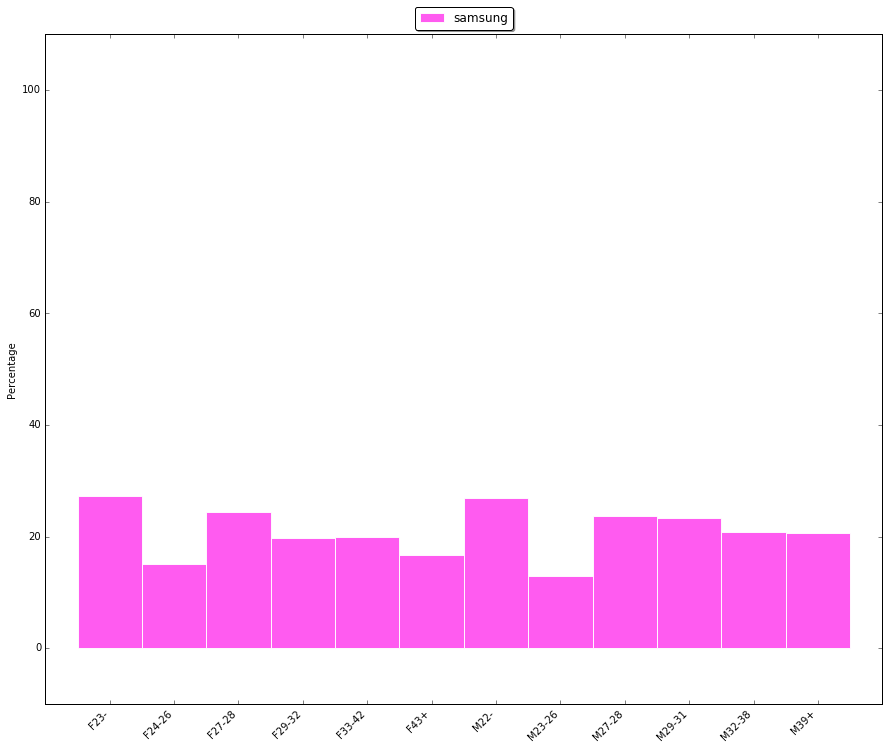

In [333]:
index_names = np.sort(dataframe2.index.values)
print(index_names)
index = [i in range(0,11)]

df = dataframe2.copy()
df.index = [9,11,5,7,8,10,3,2,6,1,0,4]
print(df)

df.sort_index(inplace=True)
print(df)
# Create a figure with a single subplot
f, ax = plt.subplots(1, figsize=(15,12))

# Set bar width at 1
bar_width = 1

# positions of the left bar-boundaries
bar_l = [i for i in range(len(df["xiaomi"]))] 

# positions of the x-axis ticks (center of the bars as bar labels)
tick_pos = [i+(bar_width/2) for i in bar_l] 

# Create the total score for each participant
columns = [df['xiaomi'], df['OPPO'], df['coolpad'], df["vivo"],df["samsung"],df["huawei"],df["meizu"],df["lenovo"]]
totals = [i1+i2+i3+i4+i5+i6+i7+i8 for i1,i2,i3,i4,i5,i6,i7,i8 in zip(df['xiaomi'], df['OPPO'], df['coolpad'], df["vivo"],df["samsung"],df["huawei"],df["meizu"],df["lenovo"])]
#print(totals)
# Create the percentage of the total score the pre_score value for each participant was
xia_rel = [i / j * 100 for  i,j in zip(df['xiaomi'], totals)]
#print(xia_rel)
# Create the percentage of the total score the mid_score value for each participant was
oppo_rel = [i / j * 100 for  i,j in zip(df['OPPO'], totals)]
#print(oppo_rel)
# Create the percentage of the total score the post_score value for each participant was
coolpad_rel = [i / j * 100 for  i,j in zip(df['coolpad'], totals)]

# Create the percentage of the total score the post_score value for each participant was
vivo_rel = [i / j * 100 for  i,j in zip(df['vivo'], totals)]

# Create the percentage of the total score the post_score value for each participant was
samsung_rel = [i / j * 100 for  i,j in zip(df['samsung'], totals)]

# Create the percentage of the total score the post_score value for each participant was
huawei_rel = [i / j * 100 for  i,j in zip(df['huawei'], totals)]

# Create the percentage of the total score the post_score value for each participant was
meizu_rel = [i / j * 100 for  i,j in zip(df['meizu'], totals)]

# Create the percentage of the total score the post_score value for each participant was
lenovo_rel = [i / j * 100 for  i,j in zip(df['lenovo'], totals)]

names = ["xiaomi","OPPO","coolpad","vivo","samsung","huawei","meizu","lenovo"]
rels = [xia_rel,oppo_rel,coolpad_rel,vivo_rel,samsung_rel,huawei_rel,meizu_rel,lenovo_rel]
colors = ["#019600","#00968e","#f40c0c","#0caef4","#ff49ef","#49ff5e","#ffce49","#666460"]


import copy
relcopy = copy.deepcopy(rels)

# sort after mean value highest
rels.sort(key=lambda x: np.mean(x),reverse=True)


for rel in range(1,2):
# Create a bar chart in position bar_1
    if rel==0:
        btm=[0]*12
    else:
        btm=[sum(x) for x in zip(*rels[:rel])]
     
    idx = relcopy.index(rels[rel])
    
    ax.bar(bar_l, 
       # using mid_rel data
       rels[rel], 
       # with pre_rel
       #bottom=btm, 
       # labeled 
       #label=names[rel],
       label=names[idx],
       # with alpha
       alpha=0.9, 
       # with color
       #color=colors[rel],
       color=colors[idx],
       # with bar width
       width=bar_width,
       # with border color
       edgecolor='white'
       ) 
    
# Set the ticks to be first names
print(df.index.values)
plt.xticks(tick_pos, index_names)
ax.set_ylabel("Percentage")
ax.set_xlabel("")

# Let the borders of the graphic
plt.xlim([min(tick_pos)-bar_width, max(tick_pos)+bar_width])
plt.ylim(-10, 110)

# rotate axis labels
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')


import matplotlib.patches as mpatches

#plt.legend([mpatches.Patch(color=colors[0],label=names[0])])
           #,mpatches.Patch(color=colors[1],label=names[1])])

    
handle, label = ax.get_legend_handles_labels()    


#red_patch = mpatches.Patch(color='red', label='The red data')
#blue_patch = mpatches.Patch(color='blue', label='The blue data')

#plt.legend(handles=[red_patch, blue_patch])

#print(names)
   
patches = []   
for i in range(0,8):
    patch = mpatches.Patch(color=colors[i],label=names[i])
    patches.append(patch)
    
plt.legend(handles=patches)

ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
          ncol=3, fancybox=True, shadow=True)    
    
#p_handle = [mpatches.Patch(color='r', alpha=0.5, linewidth=0)]
#p_label = [u'Entry Confidence Interval']
#handle, label = ax.get_legend_handles_labels()
#handles=handle+p_handle
#labels=label+p_label
    
    
    
# shot plot
plt.show()   

Wieviel Prozent der Altersgruppe besitzen ein Samsung-Gerät?

In [328]:
2440/(2440  + 712  +   410 + 700   + 1420+   1508 +  947 +   333)

0.28807556080283353

In [329]:
981/(981  +445  +   136 + 525 +    760  +  567  + 262 +   121)

0.258361864629971

In [330]:
1379/(1379 + 397  +   223+  350  +   964  +  932  + 443  +  183)

0.2831040854034079

In [256]:
means = [0]*len(rels)
for rel in range(0,len(rels)):
    means[rel] = np.mean(rels[rel])
print(means)
print(sum(means))

print(max(means))


rm_idx = means.index(max(means))
print(rm_idx)
del means[rm_idx]
print(means)

[26.025358189456508, 9.1794553614525842, 4.8866482903061756, 9.1253598491730195, 20.9766152072587, 19.010807902994834, 6.8420765321341959, 3.9536786672239845]
100.0
26.0253581895
0
[9.1794553614525842, 4.8866482903061756, 9.1253598491730195, 20.9766152072587, 19.010807902994834, 6.8420765321341959, 3.9536786672239845]


In [171]:
sum(zip(rels[4:]))

TypeError: unsupported operand type(s) for +: 'int' and 'tuple'

[32.59321829371304,
 34.635907093534215,
 37.213695395513575,
 39.31752982032312,
 29.222340994120792,
 38.58350951374207,
 36.46068569082324,
 36.2621705058181,
 31.350386674598454,
 37.48888888888889,
 31.773464504121243,
 37.55596523571241]

[6.685169542657174, 6.9209039548022595, 8.406139315230224, 10.191756001811868, 5.905932656333512, 10.535588442565187, 8.150277150482447, 10.187603894561862, 8.070592901050961, 16.466666666666665, 6.913055038553575, 11.719778772715301]
[32.59321829371304, 34.635907093534215, 37.213695395513575, 39.31752982032312, 29.222340994120792, 38.58350951374207, 36.46068569082324, 36.2621705058181, 31.350386674598454, 37.48888888888889, 31.773464504121243, 37.55596523571241]


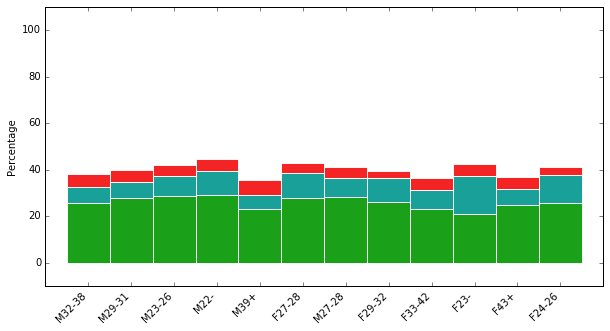

In [165]:
df = dataframe2.copy()
# Create a figure with a single subplot
f, ax = plt.subplots(1, figsize=(10,5))

# Set bar width at 1
bar_width = 1

# positions of the left bar-boundaries
bar_l = [i for i in range(len(df["xiaomi"]))] 

# positions of the x-axis ticks (center of the bars as bar labels)
tick_pos = [i+(bar_width/2) for i in bar_l] 

# Create the total score for each participant
columns = [df['xiaomi'], df['OPPO'], df['coolpad'], df["vivo"],df["samsung"],df["huawei"],df["meizu"],df["lenovo"]]
totals = [i1+i2+i3+i4+i5+i6+i7+i8 for i1,i2,i3,i4,i5,i6,i7,i8 in zip(df['xiaomi'], df['OPPO'], df['coolpad'], df["vivo"],df["samsung"],df["huawei"],df["meizu"],df["lenovo"])]
#print(totals)
# Create the percentage of the total score the pre_score value for each participant was
xia_rel = [i / j * 100 for  i,j in zip(df['xiaomi'], totals)]
#print(xia_rel)
# Create the percentage of the total score the mid_score value for each participant was
oppo_rel = [i / j * 100 for  i,j in zip(df['OPPO'], totals)]
print(oppo_rel)
# Create the percentage of the total score the post_score value for each participant was
coolpad_rel = [i / j * 100 for  i,j in zip(df['coolpad'], totals)]

# Create the percentage of the total score the post_score value for each participant was
vivo_rel = [i / j * 100 for  i,j in zip(df['vivo'], totals)]

# Create the percentage of the total score the post_score value for each participant was
samsung_rel = [i / j * 100 for  i,j in zip(df['samsung'], totals)]

# Create the percentage of the total score the post_score value for each participant was
huawei_rel = [i / j * 100 for  i,j in zip(df['huawei'], totals)]

# Create the percentage of the total score the post_score value for each participant was
meizu_rel = [i / j * 100 for  i,j in zip(df['meizu'], totals)]

# Create the percentage of the total score the post_score value for each participant was
lenovo_rel = [i / j * 100 for  i,j in zip(df['lenovo'], totals)]

names = ["xiaomi","OPPO","coolpad","vivo","samsung","huawei","meizu","lenovo"]
rels = [xia_rel,oppo_rel,coolpad_rel,vivo_rel,samsung_rel,huawei_rel,meizu_rel,lenovo_rel]
#print(rels)
colors = ["#019600","#00968e","#f40c0c","#0caef4","#ff49ef","#49ff5e","#ffce49","#666460"]

#for rel in range(0,len(rels)):
    #ax.bar(bar_l,rels[rel],label = names[rel], alpha=0.9, color=colors[rel],width=bar_width,edgecolor="white")

#for rel in range(0,5):
   # ax.bar(bar_l,rels[rel],label = names[rel], alpha=0.9, color=colors[rel],width=bar_width,edgecolor="white")
    
bottom = [0] * 8


for rel in range(0,len(rels))
# Create a bar chart in position bar_1
    if rel==0:
        bottom=[0]*8
    else:
        bottom=zip(rels[rel:])
        
        
        
ax.bar(bar_l, 
       # using pre_rel data
       rels[rel], 
       # labeled 
       label=names[0], 
       # with alpha
       alpha=0.9, 
       # with color
       color=colors[0],
       # with bar width
       width=bar_width,
       # with border color
       edgecolor='white'
       )

# Create a bar chart in position bar_1
ax.bar(bar_l, 
       # using mid_rel data
       rels[1], 
       # with pre_rel
       bottom=rels[0], 
       # labeled 
       label=names[1], 
       # with alpha
       alpha=0.9, 
       # with color
       color=colors[1], 
       # with bar width
       width=bar_width,
       # with border color
       edgecolor='white'
       )
bottom = [i+j for i,j in zip(rels[0],rels[1])]
print(bottom)
# Create a bar chart in position bar_1
ax.bar(bar_l, 
       # using post_rel data
       rels[2], 
       # with pre_rel and mid_rel on bottom
       bottom=[i+j for i,j in zip(rels[0],rels[1])], 
       # labeled 
       label=names[2],
       # with alpha
       alpha=0.9, 
       # with color
       color=colors[2], 
       # with bar width
       width=bar_width,
       # with border color
       edgecolor='white'
       )
    
    
    
    
    
    
# Set the ticks to be first names
plt.xticks(tick_pos, dataframe2.index.values)
ax.set_ylabel("Percentage")
ax.set_xlabel("")

# Let the borders of the graphic
plt.xlim([min(tick_pos)-bar_width, max(tick_pos)+bar_width])
plt.ylim(-10, 110)

# rotate axis labels
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')

# shot plot
plt.show()

In [166]:
type(bottom)

list

In [167]:
print(bottom)

[32.59321829371304, 34.635907093534215, 37.213695395513575, 39.31752982032312, 29.222340994120792, 38.58350951374207, 36.46068569082324, 36.2621705058181, 31.350386674598454, 37.48888888888889, 31.773464504121243, 37.55596523571241]


In [149]:
samsung_rel

[23.277422468927238,
 20.652856246076585,
 16.76505312868949,
 12.939755397855956,
 23.743987172634952,
 20.7892882311487,
 19.790597413262166,
 24.341011636190927,
 26.96807455879437,
 15.155555555555555,
 27.279978729061423,
 20.015801948907033]

In [141]:
raw_data = {'first_name': ['Jason', 'Molly', 'Tina', 'Jake', 'Amy'],
        'pre_score': [4, 24, 31, 2, 3],
        'mid_score': [25, 94, 57, 62, 70],
        'post_score': [5, 43, 23, 23, 51]}
df = pd.DataFrame(raw_data, columns = ['first_name', 'pre_score', 'mid_score', 'post_score'])
df

,first_name,pre_score,mid_score,post_score
0,Jason,4,25,5
1,Molly,24,94,43
2,Tina,31,57,23
3,Jake,2,62,23
4,Amy,3,70,51


[34, 161, 111, 87, 124]


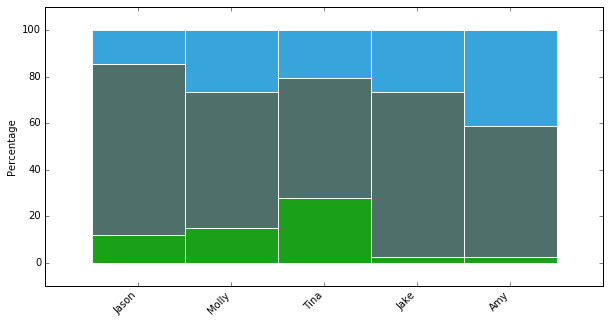

In [143]:
# Create a figure with a single subplot
f, ax = plt.subplots(1, figsize=(10,5))

# Set bar width at 1
bar_width = 1

# positions of the left bar-boundaries
bar_l = [i for i in range(len(df['pre_score']))] 

# positions of the x-axis ticks (center of the bars as bar labels)
tick_pos = [i+(bar_width/2) for i in bar_l] 

# Create the total score for each participant
totals = [i+j+k for i,j,k in zip(df['pre_score'], df['mid_score'], df['post_score'])]
print(totals)
# Create the percentage of the total score the pre_score value for each participant was
pre_rel = [i / j * 100 for  i,j in zip(df['pre_score'], totals)]

# Create the percentage of the total score the mid_score value for each participant was
mid_rel = [i / j * 100 for  i,j in zip(df['mid_score'], totals)]

# Create the percentage of the total score the post_score value for each participant was
post_rel = [i / j * 100 for  i,j in zip(df['post_score'], totals)]

# Create a bar chart in position bar_1
ax.bar(bar_l, 
       # using pre_rel data
       pre_rel, 
       # labeled 
       label='Pre Score', 
       # with alpha
       alpha=0.9, 
       # with color
       color='#019600',
       # with bar width
       width=bar_width,
       # with border color
       edgecolor='white'
       )

# Create a bar chart in position bar_1
ax.bar(bar_l, 
       # using mid_rel data
       mid_rel, 
       # with pre_rel
       bottom=pre_rel, 
       # labeled 
       label='Mid Score', 
       # with alpha
       alpha=0.9, 
       # with color
       color='#3C5F5A', 
       # with bar width
       width=bar_width,
       # with border color
       edgecolor='white'
       )

# Create a bar chart in position bar_1
ax.bar(bar_l, 
       # using post_rel data
       post_rel, 
       # with pre_rel and mid_rel on bottom
       bottom=[i+j for i,j in zip(pre_rel, mid_rel)], 
       # labeled 
       label='Post Score',
       # with alpha
       alpha=0.9, 
       # with color
       color='#219AD8', 
       # with bar width
       width=bar_width,
       # with border color
       edgecolor='white'
       )

# Set the ticks to be first names
plt.xticks(tick_pos, df['first_name'])
ax.set_ylabel("Percentage")
ax.set_xlabel("")

# Let the borders of the graphic
plt.xlim([min(tick_pos)-bar_width, max(tick_pos)+bar_width])
plt.ylim(-10, 110)

# rotate axis labels
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')

# shot plot
plt.show()

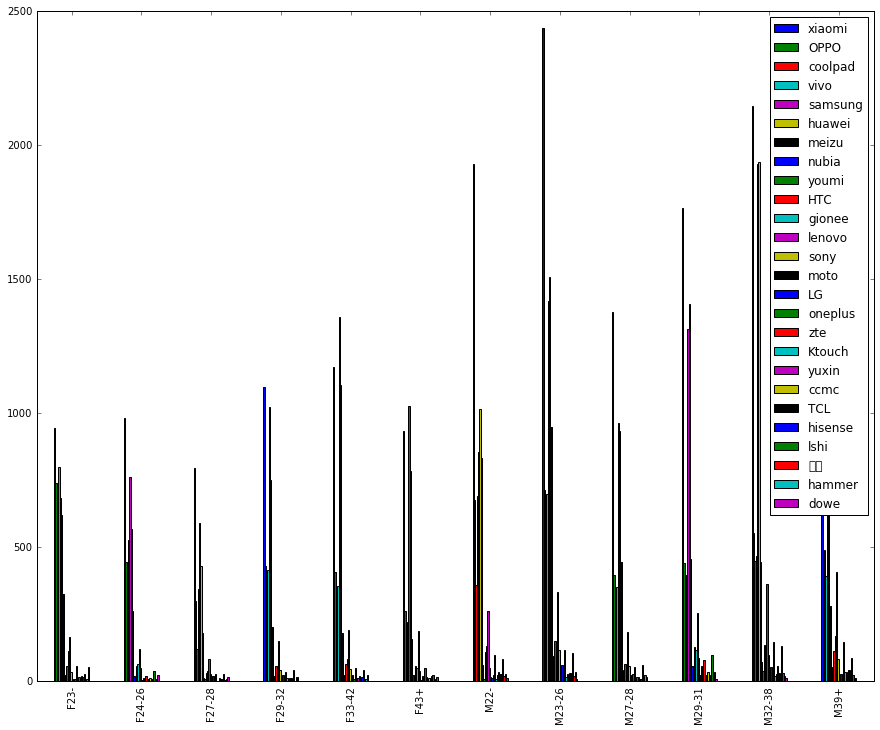

In [94]:
plt.figure(); 
dataframe.sort_index().plot(kind="bar");

In [109]:
a = np.array(range(0,len(dataframe.index)))

In [110]:
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [107]:
dataframe.iloc[0,:]

xiaomi     2147
OPPO        554
coolpad     448
vivo        466
samsung    1929
huawei     1938
meizu       444
nubia        71
youmi        36
HTC         133
gionee      129
lenovo      361
sony         96
moto         13
LG           51
oneplus      24
zte         144
Ktouch       20
yuxin        26
ccmc         58
TCL          30
hisense      25
lshi        132
奇酷           30
hammer       17
dowe         13
Name: M32-38, dtype: object

In [106]:
dataframe.iloc[0,:].as_matrix()

array([2147.0, 554.0, 448.0, 466.0, 1929.0, 1938.0, 444.0, 71.0, 36.0,
       133.0, 129.0, 361.0, 96.0, 13.0, 51.0, 24.0, 144.0, 20.0, 26.0,
       58.0, 30.0, 25.0, 132.0, 30.0, 17.0, 13.0], dtype=object)

ValueError: x and y must be the same size

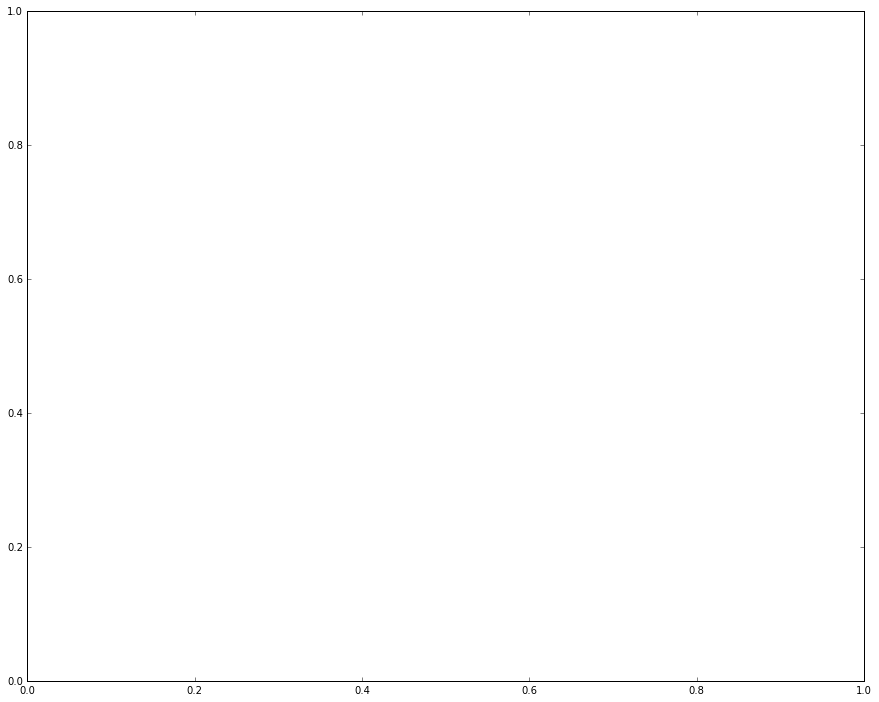

In [117]:
import numpy as np
import matplotlib.pyplot as plt
 
# Create data
N = 60
groupIndices = np.array(range(0,len(dataframe.index)))
g1 = (np.array(range(0,12)), dataframe.iloc[0,:].as_matrix())
g2 = (np.array(range(0,12)), dataframe.iloc[1,:].as_matrix())
g3 = (np.array(range(0,12)), dataframe.iloc[2,:].as_matrix())
 
data = (g1, g2, g3)
colors = ("red", "green", "blue")
groups = ("coffee", "tea", "water") 
 
# Create plot
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, axisbg="1.0")
 
for data, color, group in zip(data, colors, groups):
    x, y = data
    ax.scatter(x, y, alpha=0.8, c=color, edgecolors='none', s=30, label=group)
 
plt.title('Matplot scatter plot')
plt.legend(loc=2)
plt.show()

## Spatio-Temporale Analyse des Verhaltens einzelner User

1. Wählen Sie aus der *events*-Tabelle ein Device, für das mindestens 30 events mit zugewiesenen Geokoordinaten vorliegen.
2. Stellen Sie alle Aufenthaltsorte des zu diesem Device gehörenden Users in einer *gmaps-Heatmap* dar. Informationen hierzu finden Sie in der [gmaps-Doku]( https://github.com/pbugnion/gmaps). Für den Zugriff auf gmaps benötigen Sie einen Google-API-Key (siehe [gmaps authentication](http://jupyter-gmaps.readthedocs.io/en/latest/authentication.html))
3. Clustern Sie die 2-dimensionalen Geodaten des ausgewählten Users mit dem [DBSCAN-Algorithmus von scikit-learn](http://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html). Die Parameter des Algorithmus sind so zu wählen, dass wesentlich unterschiedliche Orte des Users in unterschiedlichen Clustern landen.
4. Stellen Sie den zeitlichen Verlauf der Events des ausgewählten Users im unten dargestellten Stil visuell dar. Auf der horizontalen Achse ist die Zeit relativ zur Zeit des ersten Events in Sekunden dargestellt. Auf der vertikalen Achse ist die Anzahl der bisherigen Events des Users aufgetragen. Mit jedem Event wird der Wert auf der vertikalen Achse um 1 erhöht. Die Farbe der Marker im Graph gibt den Aufenthaltscluster an. Für jeden in der vorigen Teilaufgabe gefundenen Aufenthaltscluster wird eine unterschiedliche Farbe benutzt (Im Beispiel unten wurden nur 2 Cluster gefunden). Diskutieren Sie das Verhalten des Users anhand des Graphs.

![Abbildung Zeitliches Auftreten der Events](https://www.hdm-stuttgart.de/~maucher/ipnotebooks/DataMining//Bilder/tempbehave.PNG "Events über der Zeit")

# Feature Extraction

Anmerkung: In den vorigen Aufgaben war das Vorgehen relativ konkret vorgegeben. In den folgenden Aufgaben sind die Vorgaben bewußt knapp gehalten. Ihre Kreativität ist gefragt.

1. Überlegen Sie sich aus welchen Merkmalen, die aus den vorhandenen Daten extrahiert werden können, möglichst gut die Gender-Age-Group vorhergesagt werden kann.
2. Extahieren Sie diese Merkmale aus den Daten für möglichst viele (mindestens 20.000) User (devices) aus der Tabelle *gender_age_train*.  

# Gender-Age-Group Prediction
1. In der vorigen Aufgabe wurde für jeden User (device) ein Merkmalsvektor berechnet. Die Menge der Merkmalsvektoren aller User aus der Tabelle *gender_age_train* bildet die Eingabe-Matrix $X$ für die Klassifikationsalgorithmen. Die Soll-Ausgabe Vektor $y$ wird durch die *gender_age_group* der User gebildet. Bringen Sie die Matrix aller Eingabevektoren in eine Form, in der
    * alle kategorialen Parameter *One-Hot*-encodiert sind [Scikit-Learn One-Hot-Encoder](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html#sklearn.preprocessing.OneHotEncoder).
    * alle Merkmale eine Varianz von 1 aufweisen. Benützen Sie hierfür die [Scikit-Learn Methode scale](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html#sklearn.preprocessing.scale).
2. Teilen Sie die Datensätze in $X$ und $y$ in eine Trainings- und eine Testpartition auf - im Verhältnis $3/4$ für Training, $1/4$ für Test. 
3. Trainieren Sie mit der Trainingspartition ein [Multilayer-Perzeptron](http://scikit-learn.org/stable/modules/neural_networks_supervised.html).
4. Testen Sie das gelernte Modell mit der Testpartition. Für die Auswertung sollte die [Accurracy](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score) und die [Confusion Matrix](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix) bestimmt werden. Finden Sie eine Parametereinstellung, die zu einer möglichst guten Accuracy führt. Interpretieren Sie die Confusion Matrix.
5. Wenden Sie nun eine [5-fache Kreuzvalidierung](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html#sklearn.model_selection.cross_val_score) an und bestimmen Sie damit eine möglichst gute Parametereinstellung.
6. Mit welchen Parametern erzielen Sie die beste Accurracy? Wie hoch ist diese dann? Diskutieren Sie das Ergebnis.
